# Séries Temporais 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
base = pd.read_csv('./dados/AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
base.dtypes

Month          object
#Passengers     int64
dtype: object

In [13]:
date_parser = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('./dados/AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=date_parser)
base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [14]:
base.dtypes

#Passengers    int64
dtype: object

In [18]:
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

Criação da Série Temporal

In [26]:
ts = base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [23]:
# Visualizar específico
ts.iloc[1] # Or
ts[1]

118

In [24]:
# Verificar por ano e mês
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [28]:
# Máximo
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [29]:
# Min
ts.index.min()

Timestamp('1949-01-01 00:00:00')

In [34]:
# INtervalos
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [37]:
# Do começo até X
ts[:'1950-07-31'][:5]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [38]:
# Por ano
ts['1950'][:5]

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
Name: #Passengers, dtype: int64

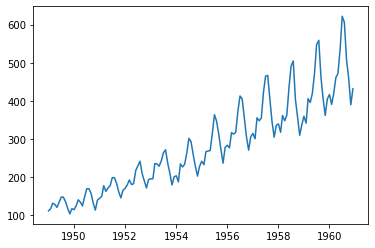

In [30]:
# Visualizar série temporal
plt.plot(ts)

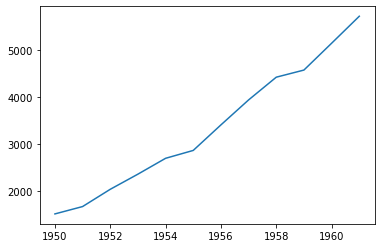

In [31]:
# Visualizar por ano:
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)

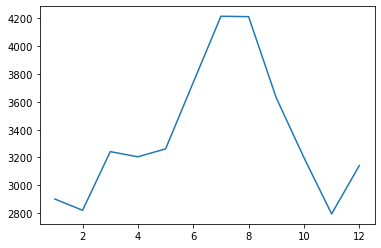

In [39]:
# Visualização por mês 
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

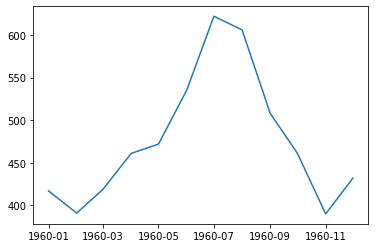

In [40]:
# Visualizar entre datas específicas
ts_datas = ts['1960-01-01':'1960-12-01']
plt.plot(ts_datas)